<a href="https://colab.research.google.com/github/lukasbeckercode/TinyML_SineExample/blob/main/TinyML_Sine_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# import dependencies
!pip install tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

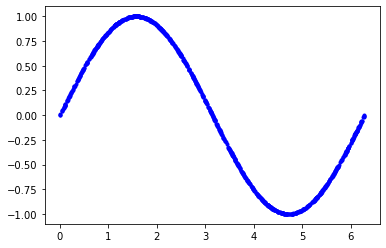

In [4]:
#Create clean sine sample data
# Prepare sine sample generation
SAMPLES = 1000
SEED = 6969
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Generate sample values 
x_vals = np.random.uniform(low=0,high=2*math.pi,size=SAMPLES)

# Make sure values are not in order
np.random.shuffle(x_vals)

# Generate corresponding y values 
y_vals = np.sin(x_vals)

# plot the results

plt.plot(x_vals, y_vals,'b.')
plt.show()

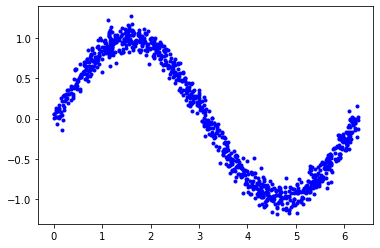

In [5]:
# add noise to previously generated data
y_vals += 0.1*np.random.randn(*y_vals.shape)
plt.plot(x_vals, y_vals,'b.')
plt.show()

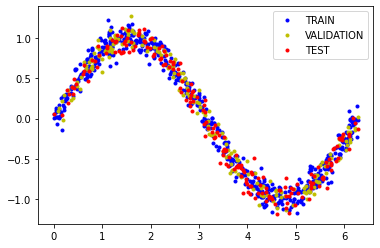

In [6]:
# splitting the data: 60% data, 20% test, 20% validation
# this calculates the inidces of this in the array
TRAIN_SPLIT= int(0.6*SAMPLES)
TEST_SPLIT = int(0.2*SAMPLES+TRAIN_SPLIT)
x_train, x_validate, x_test = np.split(x_vals,[TRAIN_SPLIT,TEST_SPLIT]) 
y_train, y_validate, y_test = np.split(y_vals,[TRAIN_SPLIT,TEST_SPLIT]) 

#check splitting worked correctly
assert (x_train.size + x_validate.size+x_test.size) == SAMPLES

#plot the data 

plt.plot(x_train,y_train,'b.',label="TRAIN")
plt.plot(x_validate,y_validate,'y.', label="VALIDATION")
plt.plot(x_test,y_test,'r.',label="TEST")
plt.legend()
plt.show()

Training data is now generated. Now, the basic model gets defined

In [14]:
# Model definition
from tensorflow import keras
from tensorflow.keras import layers

model1 = tf.keras.Sequential()

model1.add(layers.Dense(16,activation='relu', input_shape=(1,)))

model1.add(layers.Dense(1))

model1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


Definition is done, now we train the model

In [15]:
history1 = model1.fit(x_train,y_train,batch_size=16,epochs=1000,validation_data=(x_validate,y_validate))

Train on 600 samples, validate on 200 samples
Epoch 1/1000
600/600 [==============================] - 1s 1ms/sample - loss: 0.5113 - mae: 0.5882 - val_loss: 0.4285 - val_mae: 0.5567
Epoch 2/1000
600/600 [==============================] - 0s 99us/sample - loss: 0.3893 - mae: 0.5335 - val_loss: 0.3794 - val_mae: 0.5360
Epoch 3/1000
600/600 [==============================] - 0s 100us/sample - loss: 0.3617 - mae: 0.5214 - val_loss: 0.3485 - val_mae: 0.5146
Epoch 4/1000
600/600 [==============================] - 0s 102us/sample - loss: 0.3333 - mae: 0.5008 - val_loss: 0.3188 - val_mae: 0.4924
Epoch 5/1000
600/600 [==============================] - 0s 97us/sample - loss: 0.3073 - mae: 0.4828 - val_loss: 0.2913 - val_mae: 0.4707
Epoch 6/1000
600/600 [==============================] - 0s 104us/sample - loss: 0.2842 - mae: 0.4652 - val_loss: 0.2663 - val_mae: 0.4517
Epoch 7/1000
600/600 [==============================] - 0s 98us/sample - loss: 0.2617 - mae: 0.4466 - val_loss: 0.2426 - val_mae: 

1st epoch: 
- loss: 0.5113 
- mae: 0.5882 
- val_loss: 0.4285 
- val_mae: 0.5567

Last epoch: 
 - loss: 0.1551 
 - mae: 0.3085 
 - val_loss: 0.1321 
 - val_mae: 0.2823

 This model has bad mae value, plus loss and val_loss are too close to each other

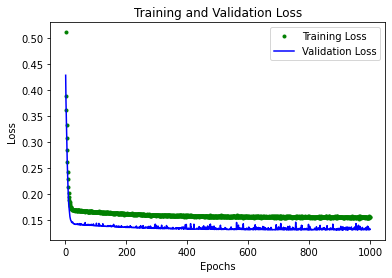

In [16]:
# find reason why the model isn't what we want yet

loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'g.', label="Training Loss")
plt.plot(epochs,val_loss,'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


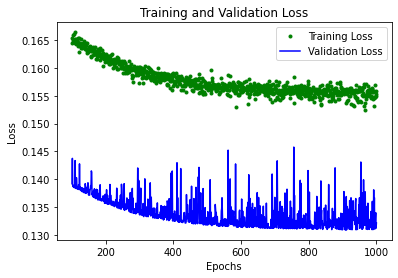

In [17]:

# find reason why the model isn't what we want yet, remove the first 100 epochs
SPLIT=100

plt.plot(epochs[SPLIT:],loss[SPLIT:],'g.', label="Training Loss")
plt.plot(epochs[SPLIT:],val_loss[SPLIT:],'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

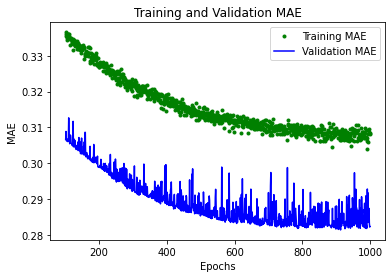

In [18]:

# find reason why the model isn't what we want yet, plot mae now
SPLIT=100

mae= history1.history['mae']
val_mae= history1.history['val_mae']

plt.plot(epochs[SPLIT:],mae[SPLIT:],'g.', label="Training MAE")
plt.plot(epochs[SPLIT:],val_mae[SPLIT:],'b', label="Validation MAE")
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

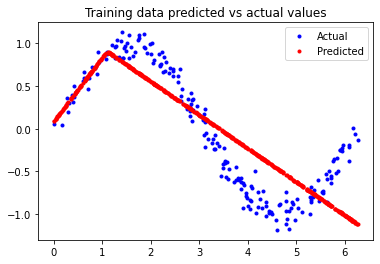

In [20]:
#plot predication vs actual values
prediction = model1.predict(x_train)

plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test,y_test,'b.',label='Actual')
plt.plot(x_train,prediction,'r.',label='Predicted')
plt.legend()
plt.show()

from the last plot, it becomes clear that this model cannot learn to approximate the sinewave well enough, so lets make some improvements

In [21]:

model2 = tf.keras.Sequential()

model2.add(layers.Dense(16,activation='relu', input_shape=(1,)))

model2.add(layers.Dense(16,activation='relu'))

model2.add(layers.Dense(1))

model2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [22]:
# train second model now

history2 = model2.fit(x_train,y_train,batch_size=16,epochs=600,validation_data=(x_validate,y_validate))

Train on 600 samples, validate on 200 samples
Epoch 1/600
600/600 [==============================] - 1s 1ms/sample - loss: 0.4103 - mae: 0.5529 - val_loss: 0.3824 - val_mae: 0.5325
Epoch 2/600
600/600 [==============================] - 0s 115us/sample - loss: 0.3436 - mae: 0.5063 - val_loss: 0.3133 - val_mae: 0.4882
Epoch 3/600
600/600 [==============================] - 0s 108us/sample - loss: 0.2926 - mae: 0.4708 - val_loss: 0.2599 - val_mae: 0.4474
Epoch 4/600
600/600 [==============================] - 0s 134us/sample - loss: 0.2466 - mae: 0.4328 - val_loss: 0.2146 - val_mae: 0.4050
Epoch 5/600
600/600 [==============================] - 0s 108us/sample - loss: 0.2144 - mae: 0.4030 - val_loss: 0.1840 - val_mae: 0.3728
Epoch 6/600
600/600 [==============================] - 0s 112us/sample - loss: 0.1928 - mae: 0.3802 - val_loss: 0.1622 - val_mae: 0.3483
Epoch 7/600
600/600 [==============================] - 0s 129us/sample - loss: 0.1763 - mae: 0.3596 - val_loss: 0.1602 - val_mae: 0.33

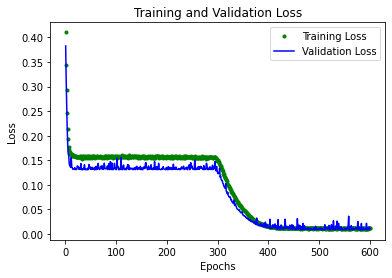

In [23]:
# Looks way better now


loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'g.', label="Training Loss")
plt.plot(epochs,val_loss,'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

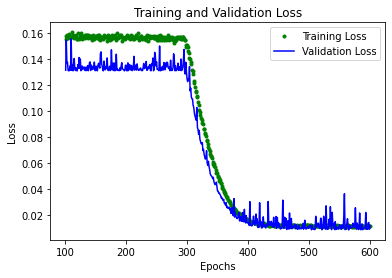

In [24]:

plt.plot(epochs[SPLIT:],loss[SPLIT:],'g.', label="Training Loss")
plt.plot(epochs[SPLIT:],val_loss[SPLIT:],'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

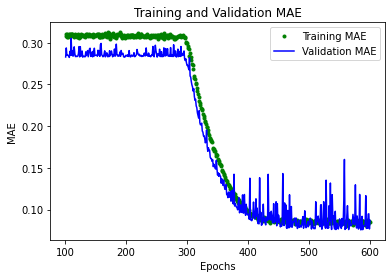

In [26]:

plt.clf()

mae= history2.history['mae']
val_mae= history2.history['val_mae']

plt.plot(epochs[SPLIT:],mae[SPLIT:],'g.', label="Training MAE")
plt.plot(epochs[SPLIT:],val_mae[SPLIT:],'b', label="Validation MAE")
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

200/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

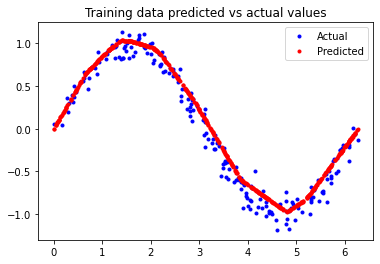

In [29]:
#plot predication vs actual values
loss = model2.evaluate(x_test,y_test)

prediction = model2.predict(x_train)

plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test,y_test,'b.',label='Actual')
plt.plot(x_train,prediction,'r.',label='Predicted')
plt.legend()
plt.show()